In [10]:
import pandas_datareader.data as web
import datetime

#pd.core.common.is_list_like = pd.api.types.is_list_like

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 2, 10)

SP500 = web.DataReader(['sp500'], 'fred', start, end)
print(SP500)

              sp500
DATE               
2011-01-18  1295.02
2011-01-19  1281.92
2011-01-20  1280.26
2011-01-21  1283.35
2011-01-24  1290.84
...             ...
2020-02-04  3297.59
2020-02-05  3334.69
2020-02-06  3345.78
2020-02-07  3327.71
2020-02-10  3352.09

[2365 rows x 1 columns]


In [11]:
import requests

#BTCUSD contains a dictionary
demo = 'bc9e7aacc595f1ec44ac3d9a653b66a8'
BTCUSD = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/crypto/BTCUSD?apikey={demo}')

BTCUSD = BTCUSD.json()
BTCUSD = BTCUSD['historical']

In [12]:
#BTCUSD

In [13]:
import pandas as pd

BTC = pd.DataFrame.from_dict(BTCUSD)
BTC.set_index('date',inplace=True)
#Keep only the close column
BTC = BTC[['close']]
#Rename the column name to BTC
BTC.columns = ['BTC']
BTC

,BTC
date,
2021-01-19,36819.210938
2021-01-18,36630.074219
2021-01-17,35791.277344
2021-01-16,36178.140625
2021-01-15,36825.367188
...,...
2016-01-23,387.490997
2016-01-22,382.492004
2016-01-21,410.261993


In [14]:
SP500BTC = BTC.merge(SP500, how='inner',right_index = True, left_index=True)

#Drop NA since we have nan values for weekends. S&P500 only trades business days
SP500BTC.dropna(inplace=True)

print(SP500BTC)

Empty DataFrame
Columns: [BTC, sp500]
Index: []


In [15]:
correlation = SP500BTC.corr()
print(correlation)

       BTC  sp500
BTC    NaN    NaN
sp500  NaN    NaN


By looking into our results, we see that we have a strong and positive correlation of 0.78 between the price of Bitcoin and S&P 500

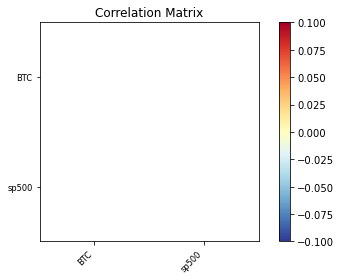

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()

Correlation Matrix Bitcoin and S&P 500

The red colour of the graph means that the relationship is strong and positive

In [17]:
SP500BTC_2020 = SP500BTC.loc["01-2020":"06-2020"]
correlation = SP500BTC_2020.corr()
print(correlation)

       BTC  sp500
BTC    NaN    NaN
sp500  NaN    NaN


In [18]:
print(SP500BTC_2020)

Empty DataFrame
Columns: [BTC, sp500]
Index: []
